In [121]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
from keras  import models, layers, optimizers

In [140]:

import matplotlib.pyplot as plt

In [141]:
def PlotTestTrainImages(indTrain, indTest, x_tr = None, y_tr = None, x_tst = None, y_tst = None, y_tr_pred=None, y_tst_pred=None):
    for i in (x_tr, y_tr, x_tst, y_tst, y_tr_pred, y_tst_pred):
        if (i is None):
            print ("Data empty, Returning")

    #Now create a 10 by 10 display for image
    plt.figure(figsize=[10,10])

    
    # Display the training image in training data
    plt.subplot(121)
    plt.title("Train Data: Ind={}, A={}, Pred={}".format(indTrain, y_tr[indTrain], y_tr_pred[indTest]))
    plt.imshow(x_tr[indTrain, :, :], cmap='gray')

    # Display the Testing image in testing data
    plt.subplot(122)
    plt.title("Test Data: Ind={}, A={}, Pred={}".format(indTest, y_tst[indTest], y_tst_pred[indTest]))
    plt.imshow(x_tst[indTest,:,:], cmap='gray')

In [142]:
def CreateModel(x_train, y_train):
    network = models.Sequential(name="SeqMNIST")
    network.add(layers.Dense(512, activation="relu", input_shape =(28*28,),name="input_lay1"))
    network.add(layers.Dense(20, activation="relu", name="Hidden_lay2"))
    network.add(layers.Dense(10, activation="softmax", name="Final_Layer"))
    return network

In [143]:
def getDataset():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
    x_train = x_train/255
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
    x_test = x_test/255

    y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
    y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)
    return x_train, y_train, x_test, y_test, y_train_cat, y_test_cat

In [144]:
x_train, y_train, x_test, y_test,y_train_cat, y_test_cat = getDataset()
print (x_train.shape)

(60000, 784)


In [145]:
def mainDriverMNistKeras(opt, x_train, y_train, x_test, y_test, y_train_cat, y_test_cat, num_epochs=5):
    network = CreateModel(x_train, y_train)

    network.compile(optimizer= opt, loss = "categorical_crossentropy", metrics = ["accuracy"])
    network.fit(x_train, y_train_cat, epochs=num_epochs, batch_size=1024)

    y_pred_train = network.predict(x_train)
    print(y_pred_train[101])
    y_pred_train_val = np.argmax(y_pred_train, axis=1)
    result_train=(y_pred_train_val == y_train)
    print ("Num correct Train = ", np.sum(result_train), "and %Correct= ", np.sum(result_train)/len(result_train))
    y_pred_test = network.predict(x_test)
    y_pred_test_val = np.argmax(y_pred_test, axis=1)
    result_test=(y_pred_test_val == y_test)
    print ( "Num correct Test = ", np.sum(result_test), "and  %Correct= ", np.sum(result_test)/len(result_test))
    return network, y_pred_train_val, y_pred_test_val

In [146]:
network, y_tr_pred, y_tst_pred = mainDriverMNistKeras(optimizers.RMSprop(lr=0.001), x_train, y_train, x_test, y_test,y_train_cat, y_test_cat)

Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.6217 - acc: 0.8205
Epoch 2/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2547 - acc: 0.9282
Epoch 3/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.1782 - acc: 0.9490
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.1376 - acc: 0.9593
Epoch 5/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.1104 - acc: 0.9679
[9.4098563e-04 3.3391502e-06 1.5366603e-06 3.4109973e-05 7.9724920e-04
 4.2203292e-03 3.2126536e-06 9.9233282e-01 4.1139283e-04 1.2549963e-03]
Num correct Train =  58167 and %Correct=  0.96945
Num correct Test =  9624 and  %Correct=  0.9624


(60000, 28, 28)
(10000, 28, 28)
too large 100000 100


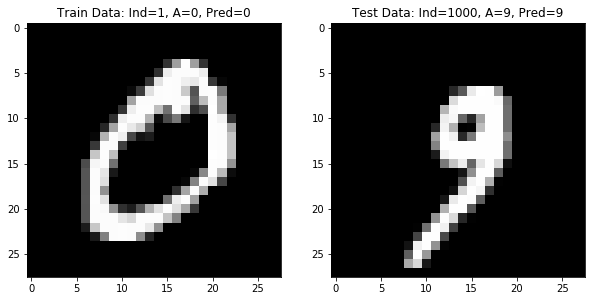

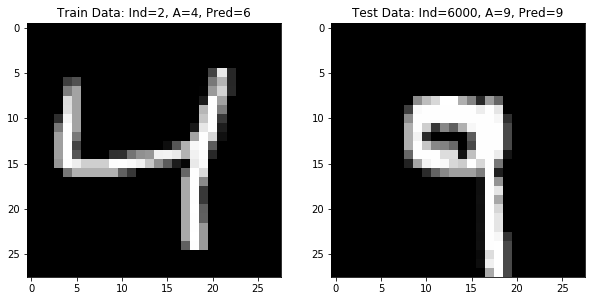

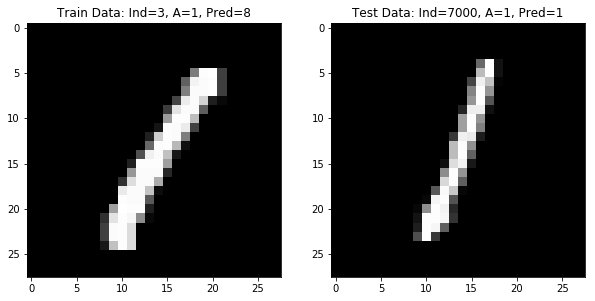

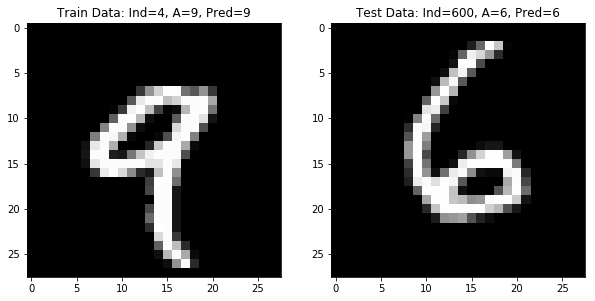

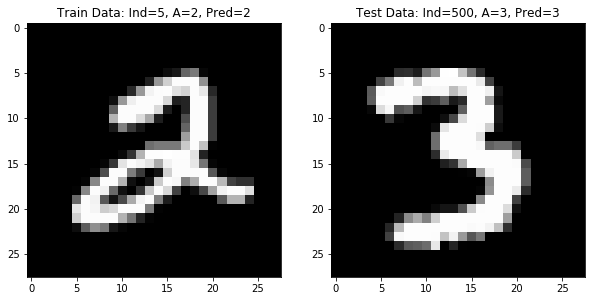

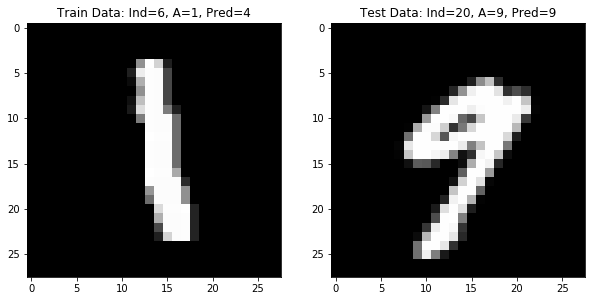

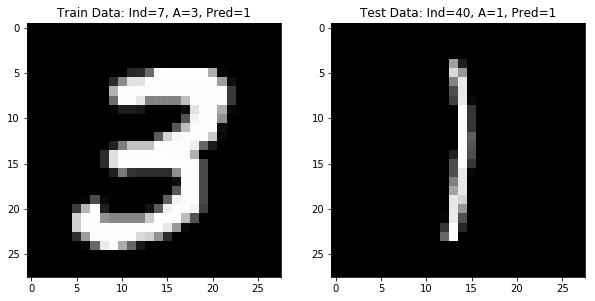

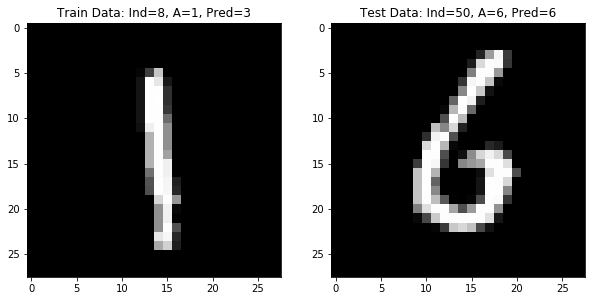

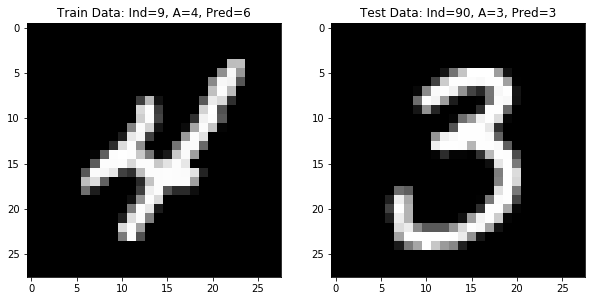

In [148]:
#Now lets see the image
indTrainToPlot = [100000, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
indTestToPlot = [100, 1000, 6000, 7000, 600, 500, 20, 40, 50, 90]
#x_train = np.reshape(x_train, (-1, 28, 28))
x_train = x_train.reshape((-1, 28, 28))
print (x_train.shape)
x_test = x_test.reshape((-1, 28, 28))
print (x_test.shape)

for i in range(len (indTestToPlot)):
    trInd = indTrainToPlot[i]
    tstInd = indTestToPlot[i]
    if (trInd < x_train.shape[0] and tstInd < x_test.shape[0]):
        PlotTestTrainImages(trInd,tstInd, x_train, y_train, x_test, y_test, y_tr_pred, y_tst_pred)
    else:
        print ("too large", trInd, tstInd)
            

In [ ]:
#Lets see some intermediate layer output
print (network.layers)

In [ ]:
for l in network.layers:
    print (l, l.name)

In [18]:
layer_name = 'Hidden_lay2'
from keras import Model
intermediate_layer_model = Model(inputs=network.input,
                                 outputs=network.get_layer(layer_name).output)
#print (intermediate_layer_model.__dict__)
out_inter = intermediate_output = intermediate_layer_model.predict(x_train)

In [120]:
#Lets get audit train on layers
from keras.models import Model
layer_outputs = [layer.output for layer in network.layers]
i = 0
print ("#Layers = ", len(layer_outputs))
for l in network.layers:
    print ("Layer #", i, "Name=", l.name)
    print ("Config=", l.get_config())
    print ("Weights=", len(l.get_weights()), "shape=",len(l.get_weights()[0]),",", len(l.get_weights()[1]))
    print ("\nOutput =", l.output, "\n")
    i+=1


#Layers =  3
Layer # 0 Name= input_lay1
Config= {'name': 'input_lay1', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
Weights= 2 shape= 784 , 512

Output = Tensor("input_lay1_3/Relu:0", shape=(?, 512), dtype=float32) 

Layer # 1 Name= Hidden_lay2
Config= {'name': 'Hidden_lay2', 'trainable': True, 'units': 20, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, '